In [84]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt  


In [85]:
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [86]:
df.shape

(545, 13)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [88]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [89]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


To Check if any Missing Values present in Dataset

In [90]:
missing_value=df.isnull().sum()
missing_value

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [91]:
df_num=df.select_dtypes(include=np.number)
df_num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [92]:
df_cat=df.select_dtypes(exclude=np.number)
df_cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


Converting Categorical column datatypes into numerical datatypes

In [93]:
df_cat_encoded=pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded=df_cat_encoded.astype(int)
df_cat_encoded

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0
3,1,0,1,0,1,1,0,0
4,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,0,1
541,0,0,0,0,0,0,1,0
542,1,0,0,0,0,0,0,1
543,0,0,0,0,0,0,0,0


SKEWNESS


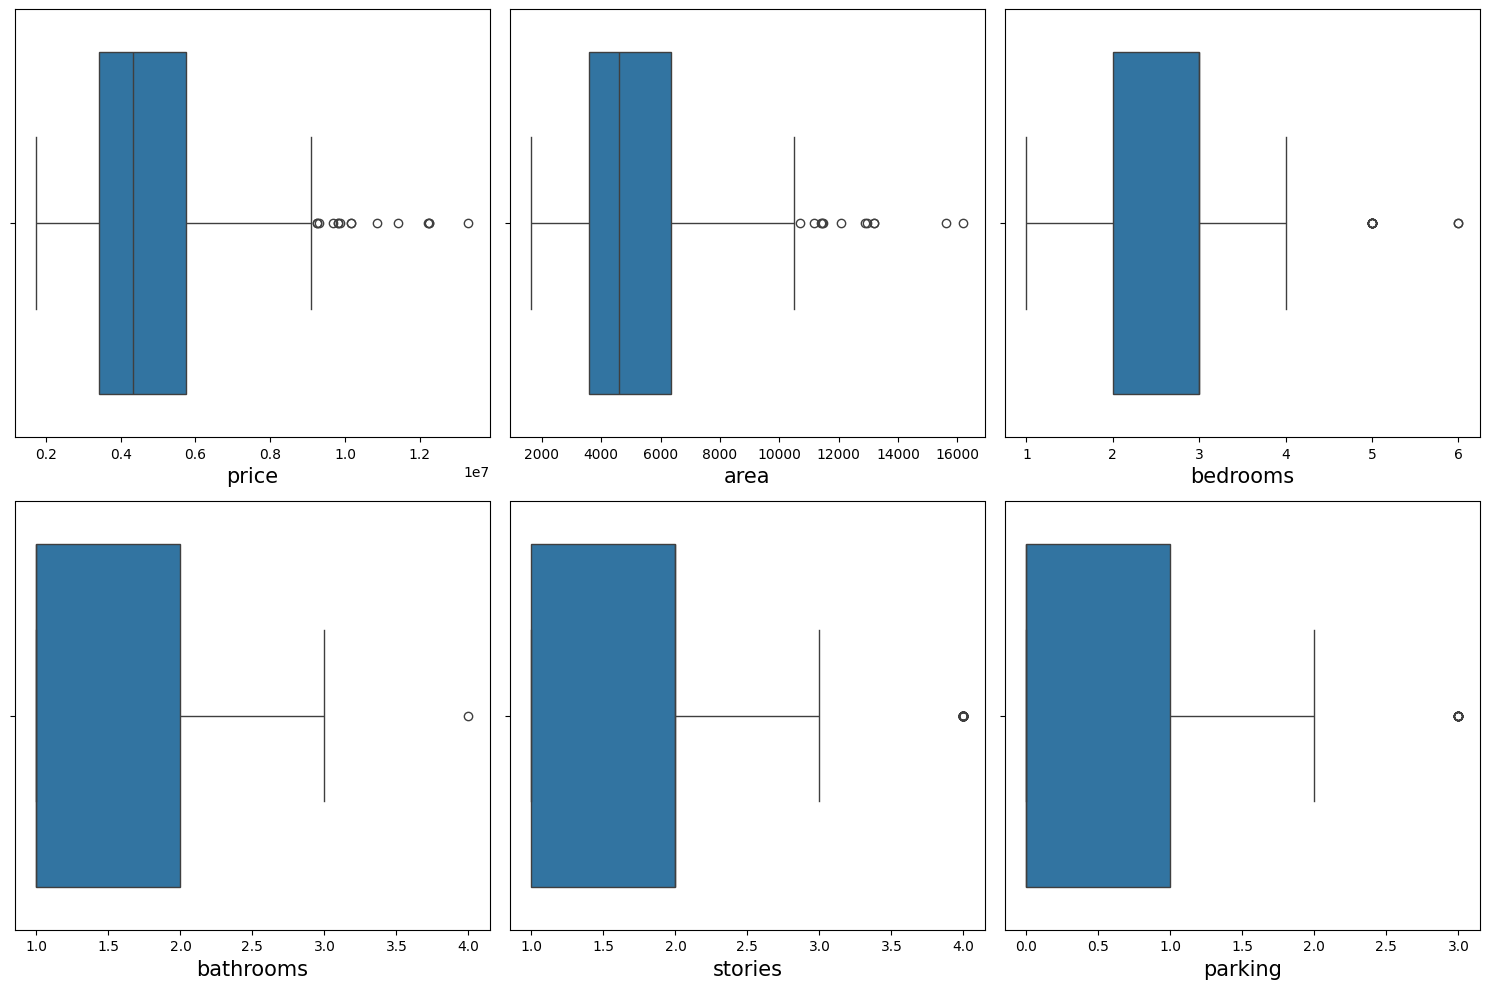

In [94]:
df_num = df.select_dtypes(include=['int64'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for column, subplot in zip(df_num.columns, axes.flatten()):
    sb.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

Density Plot

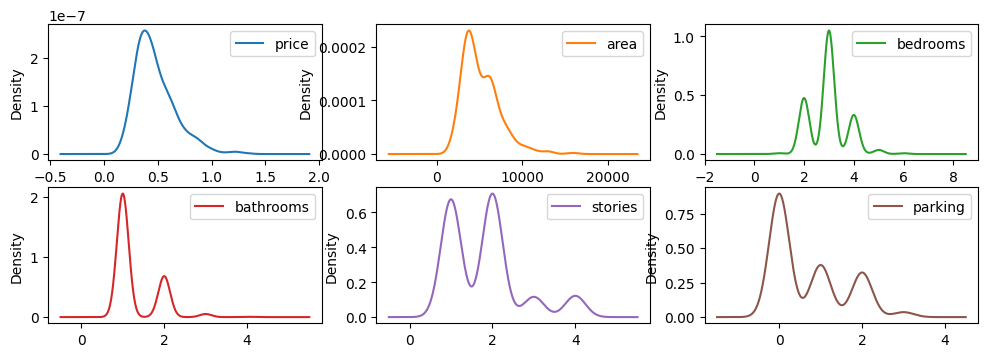

In [95]:
df_num.plot(kind='density', sharex=False, layout=(3,3), subplots=True, figsize=(12,6))
plt.show()

In [96]:
import statsmodels
import statsmodels.api as sm

In [97]:
from sklearn.preprocessing import PowerTransformer
power_transformer=PowerTransformer()
pt=power_transformer.fit_transform(df[['price','area','bedrooms','bathrooms','stories','parking']])
pt

array([[ 2.77097674,  1.11545673,  1.35413392,  1.66118585,  1.33057611,
         1.34730508],
       [ 2.57875644,  1.55960141,  1.35413392,  1.76728263,  1.81464089,
         1.61415896],
       [ 2.57875644,  1.80429146,  0.12330349,  1.66118585,  0.52147758,
         1.34730508],
       ...,
       [-2.64987025, -0.67255906, -1.39272943, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -1.24861134,  0.12330349, -0.59919871, -1.10310312,
        -0.88952552],
       [-2.64987025, -0.51281107,  0.12330349, -0.59919871,  0.52147758,
        -0.88952552]])

Power Transformed Values

In [98]:
df_pt=pd.DataFrame(data=pt, columns=df_num.columns)
df_pt

,price,area,bedrooms,bathrooms,stories,parking
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305
...,...,...,...,...,...,...
540,-2.530392,-1.167310,-1.392729,-0.599199,-1.103103,1.347305
541,-2.620103,-1.770055,0.123303,-0.599199,-1.103103,-0.889526
542,-2.649870,-0.672559,-1.392729,-0.599199,-1.103103,-0.889526
543,-2.649870,-1.248611,0.123303,-0.599199,-1.103103,-0.889526


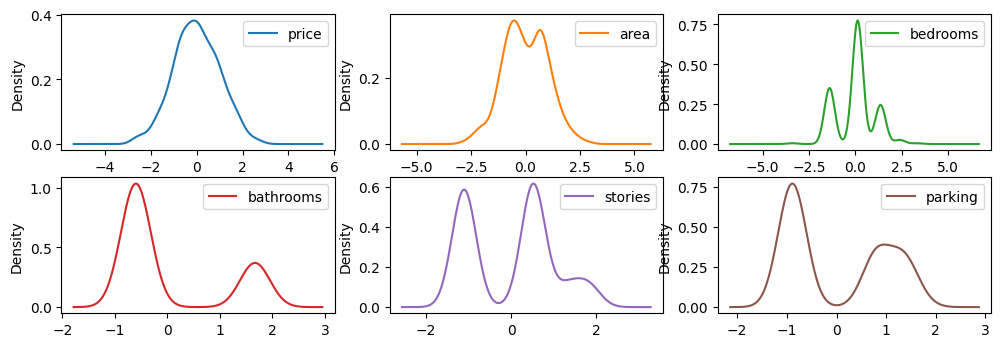

In [99]:

df_pt.plot(kind='density',subplots=True,layout=(3,3),sharex=False, figsize=(12,6))
plt.show()

In [100]:
df_pt.skew()

price        0.002774
area         0.004175
bedrooms     0.000540
bathrooms    1.073066
stories      0.121281
parking      0.311355
dtype: float64

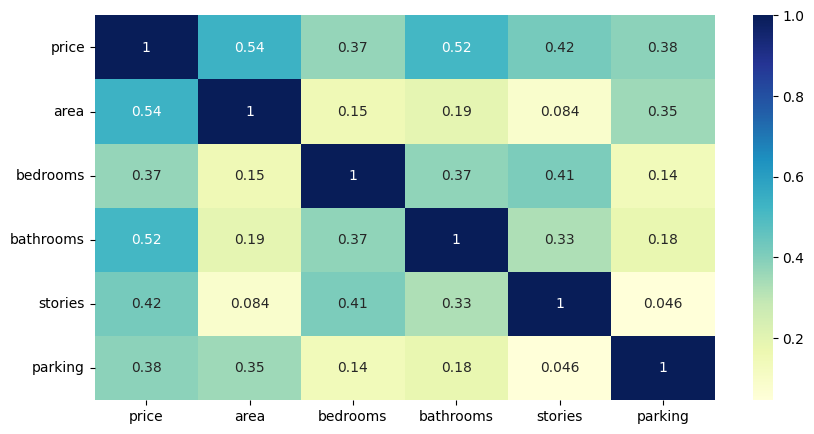

In [101]:
plt.figure(figsize=(10,5))
sb.heatmap(df_num.corr(),annot=True, cmap="YlGnBu")
plt.show()

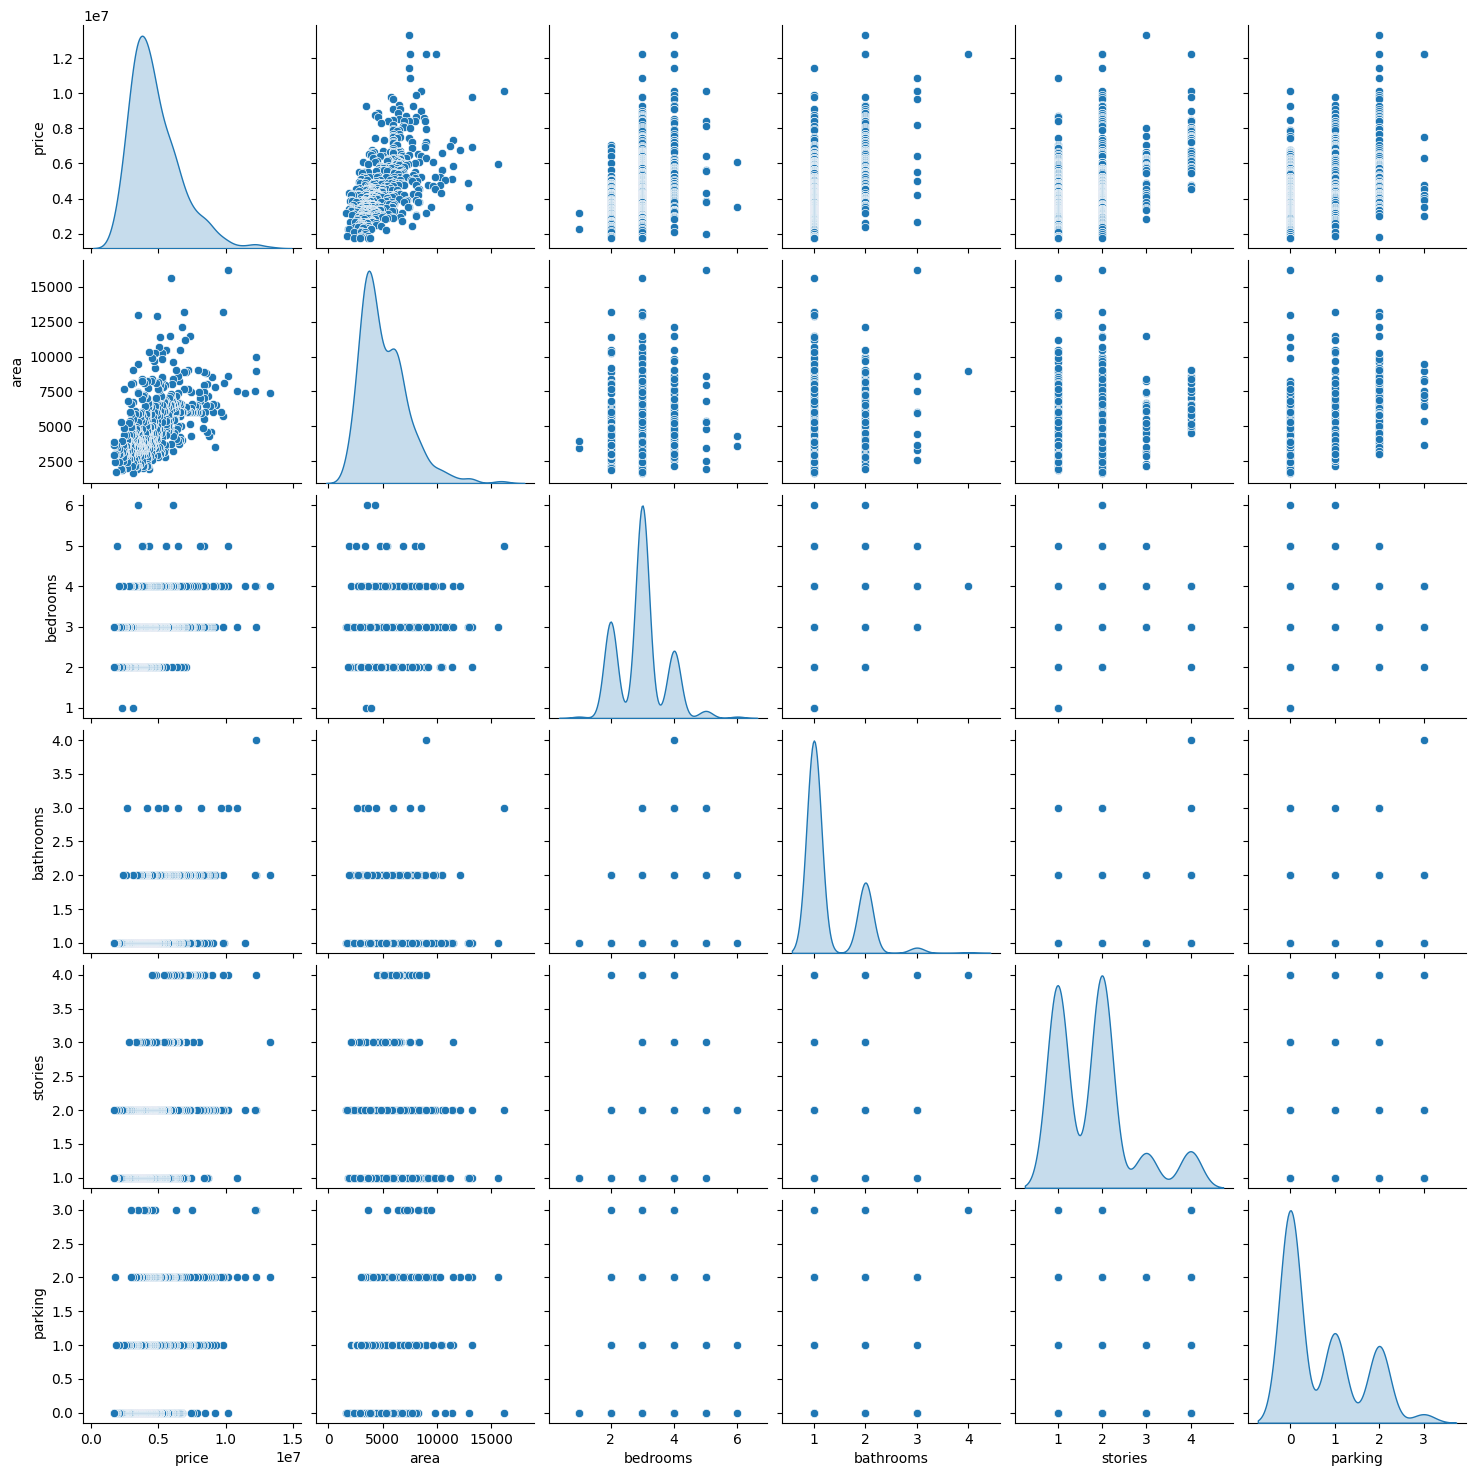

In [102]:
sb.pairplot(data=df_num,diag_kind='kde')
plt.show()

In [103]:
df1=pd.concat([df_pt,df_cat_encoded], axis=1)
df1

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,2.770977,1.115457,1.354134,1.661186,1.330576,1.347305,1,0,0,0,1,1,0,0
1,2.578756,1.559601,1.354134,1.767283,1.814641,1.614159,1,0,0,0,1,0,0,0
2,2.578756,1.804291,0.123303,1.661186,0.521478,1.347305,1,0,1,0,0,1,1,0
3,2.572030,1.140991,1.354134,1.661186,0.521478,1.614159,1,0,1,0,1,1,0,0
4,2.410998,1.115457,1.354134,-0.599199,0.521478,1.347305,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-2.530392,-1.167310,-1.392729,-0.599199,-1.103103,1.347305,1,0,1,0,0,0,0,1
541,-2.620103,-1.770055,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,1,0
542,-2.649870,-0.672559,-1.392729,-0.599199,-1.103103,-0.889526,1,0,0,0,0,0,0,1
543,-2.649870,-1.248611,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,0,0


Model Building

In [104]:
X=df1.drop('price', axis=1)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.115457,1.354134,1.661186,1.330576,1.347305,1,0,0,0,1,1,0,0
1,1.559601,1.354134,1.767283,1.814641,1.614159,1,0,0,0,1,0,0,0
2,1.804291,0.123303,1.661186,0.521478,1.347305,1,0,1,0,0,1,1,0
3,1.140991,1.354134,1.661186,0.521478,1.614159,1,0,1,0,1,1,0,0
4,1.115457,1.354134,-0.599199,0.521478,1.347305,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.167310,-1.392729,-0.599199,-1.103103,1.347305,1,0,1,0,0,0,0,1
541,-1.770055,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,1,0
542,-0.672559,-1.392729,-0.599199,-1.103103,-0.889526,1,0,0,0,0,0,0,1
543,-1.248611,0.123303,-0.599199,-1.103103,-0.889526,0,0,0,0,0,0,0,0


In [105]:
y=df1.price
y

0      2.770977
1      2.578756
2      2.578756
3      2.572030
4      2.410998
         ...   
540   -2.530392
541   -2.620103
542   -2.649870
543   -2.649870
544   -2.649870
Name: price, Length: 545, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split

X=sm.add_constant(X)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,1.0,1.030285,0.123303,-0.599199,-1.103103,1.347305,1,0,1,0,0,1,0,1
363,1.0,-0.698593,-1.392729,-0.599199,-1.103103,-0.889526,1,0,0,1,0,0,1,0
370,1.0,-0.241047,-1.392729,-0.599199,-1.103103,1.347305,1,0,0,0,1,0,1,0
31,1.0,0.976125,0.123303,-0.599199,1.814641,1.347305,1,0,0,0,1,0,1,0
113,1.0,1.724320,0.123303,-0.599199,-1.103103,1.347305,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0.602654,1.354134,1.661186,1.814641,-0.889526,1,0,0,0,1,0,0,1
106,1.0,0.366095,1.354134,1.661186,-1.103103,-0.889526,1,0,1,0,1,1,1,0
270,1.0,-0.113625,0.123303,1.661186,1.330576,0.802296,1,0,0,1,0,0,0,0
435,1.0,-0.388728,-1.392729,-0.599199,-1.103103,-0.889526,1,0,0,0,0,0,0,1


In [107]:
print('X TRAIN',X_train.shape)
print('y TRAIN',y_train.shape)
print('X TEST',X_test.shape)
print('y Test',y_test.shape)

X TRAIN (381, 14)
y TRAIN (381,)
X TEST (164, 14)
y Test (164,)


In [108]:
MLS_model=sm.OLS(y_train, X_train).fit()
MLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.28
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.78e-89
Time:                        17:23:26   Log-Likelihood:                -283.19
No. Observations:                 381   AIC:                             594.4
Df Residuals:                     367   BIC:                             649.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.3929      0.099     -3.962      0.000      -0.588      -0.198
area                                0.3524      0.032     10.897      0.000       0.289       0.416
bedrooms                            0.0526      0.032      1.625      0.105      -0.011       0.116
bathrooms                           0.2272      0.031      7.436      0.000       0.167       0.287
stories                             0.1569      0.034      4.649      0.000       0.091       0.223
parking                             0.0980      0.029      3.341      0.001       0.040       0.156
mainroad_yes                        0.2408      0.085      2.824      0.005       0.073       0.408
guestroom_yes                       0.1167      0.077      1.512      0.131      -0.035       0.268
basement_yes                        0.2865      0.065      4.401      0.000       0.158       0.414
hotwaterheating_yes                 0.2766      0.123      2.254      0.025       0.035       0.518
airconditioning_yes                 0.3636      0.064      5.660      0.000       0.237       0.490
prefarea_yes                        0.2912      0.067      4.348      0.000       0.160       0.423
furnishingstatus_semi-furnished    -0.0092      0.067     -0.138      0.891      -0.141       0.122
furnishingstatus_unfurnished       -0.3138      0.074     -4.231      0.000      -0.460      -0.168
==============================================================================
Omnibus:                        3.984   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                4.552
Skew:                          -0.092   Prob(JB):                        0.103
Kurtosis:                       3.503   Cond. No.                         7.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PREDICTION OF VALUES

In [109]:
y_pred=MLS_model.predict(X_test)
y_pred

316    0.386739
77     1.289152
360   -0.767932
90     0.120644
493   -0.697152
         ...   
395   -0.509878
425   -0.471397
195    0.751342
452    0.476116
154    0.207008
Length: 164, dtype: float64

In [110]:
from sklearn.metrics import mean_squared_error as mse
mse=mse(y_pred, y_test)
mse

0.41786910243335

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [113]:
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)
print("Linear Regression Predictions:")
print(linear_reg_predictions)

Linear Regression Predictions:
[-0.77269219  1.45759833 -1.43650479 -0.12937186 -1.35855697 -1.56385974
  0.31965933  1.27602097 -2.53690324 -2.42237401  2.05900186 -2.12101875
 -2.09325598 -1.4569776  -1.18353431 -1.71884342 -1.85945057 -0.45991528
 -0.66622495 -1.08054041  0.10235889  1.47271009 -2.19091821 -0.07130966
  0.11628673  1.71122253 -1.45121951  0.05540993  2.21499436 -1.44312005
  1.47415706 -1.83897844  1.00163605 -0.66322616 -1.54860713  0.48698214
  0.14140656 -0.54727908 -2.07783776 -0.84876871 -0.53521402 -1.41482416
  1.44682109 -0.88255222 -0.97784936 -0.80906288  0.7591619  -0.74712465
 -1.48700289 -1.55765542  0.51107907 -2.20853792 -0.6710042  -0.32897595
 -1.20099743 -2.35012082  1.21450943 -2.26030709 -0.6220127  -2.15314962
 -0.31800405 -2.55331025  0.01015858 -0.5317471  -0.60102897  0.2909393
  1.28480053 -1.44695571 -0.60546154  1.55531534 -0.98764872  0.11490146
 -0.60500545  2.24593741 -1.53477481  0.77209192 -0.98227569  0.19021027
 -0.03567673 -1.00713

c:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [118]:
from sklearn.metrics import mean_squared_error

mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions)
print(f'Linear Regression Mean Squared Error: {mse_linear_reg}')


Linear Regression Mean Squared Error: 0.7009234802600156


In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [120]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [121]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

nn_predictions = model.predict(X_test_scaled).flatten()

Epoch 1/50

12/12 [==============================] - 1s 7ms/step - loss: 1.0244
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7205
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5286
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4178
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3542
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3184
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2973
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2779
Epoch 9/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2653
Epoch 10/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2560
Epoch 11/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2468
Epoch 12/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2397
Epoch 13/50
12/12 [=============================

In [122]:
print("\nNeural Network Predictions:")
print(nn_predictions)


Neural Network Predictions:
[ 0.4530641   1.3033676  -0.58336663  0.03598421 -0.43454605 -0.6532504
  0.30451748  0.67039526 -0.65009195 -1.0136713   2.017137   -1.1919909
 -1.2643285  -0.5583166  -0.650746   -0.5703601  -0.5842932   0.0509207
  0.05016861 -0.33347616  0.55696785  0.7849178  -1.2585559   0.21580303
  0.75640607  1.509707   -0.54259616  0.04063595  1.944366   -0.41738904
  0.60267574 -1.0719914   0.71327645  0.08496324 -1.0435889   0.9213663
  0.2585755  -0.23262794 -0.99510926 -0.3051408   0.37440106 -1.308121
  1.2870636  -0.14687937 -0.23504455 -0.8264754   1.5270767  -0.06632175
 -0.6926138  -0.8286014   1.7678318  -1.1384436  -0.22685505 -0.14830962
 -0.64070255 -1.0248151   1.5636253  -1.0729296  -0.02634411 -1.2225891
 -0.11911219 -0.8337063   0.03197763 -0.5554394  -0.35102797  0.14367342
  0.79263645 -0.920757    0.24845886  0.9653534  -0.24420872  0.4207207
 -0.15579817  1.7767863  -1.0963956   0.27330136 -0.25939387  0.1837261
 -0.0024823  -0.527209    1.776

In [123]:
mse_nn = mean_squared_error(y_test, nn_predictions)
print(f'Neural Network Mean Squared Error: {mse_nn}')

Neural Network Mean Squared Error: 0.46543295236328


In [124]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
316,-0.219719,0.386739
77,1.082213,1.289152
360,-0.467071,-0.767932
90,1.000152,0.120644
493,-1.258798,-0.697152
...,...,...
395,-0.628551,-0.509878
425,-0.742438,-0.471397
195,0.324367,0.751342
452,-0.923773,0.476116
